In [1]:
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t
import pylab

import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure
import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale= 1)


# Central limit theorem


- In probability theory, the central limit theorem (CLT) establishes that, in many situations, when independent random variables are summed up, their properly normalized sum tends toward a normal distribution even if the original variables themselves are not normally distributed.

- The theorem is a key concept in probability theory because it implies that probabilistic and statistical methods that work for normal distributions can be applicable to many problems involving other types of distributions.

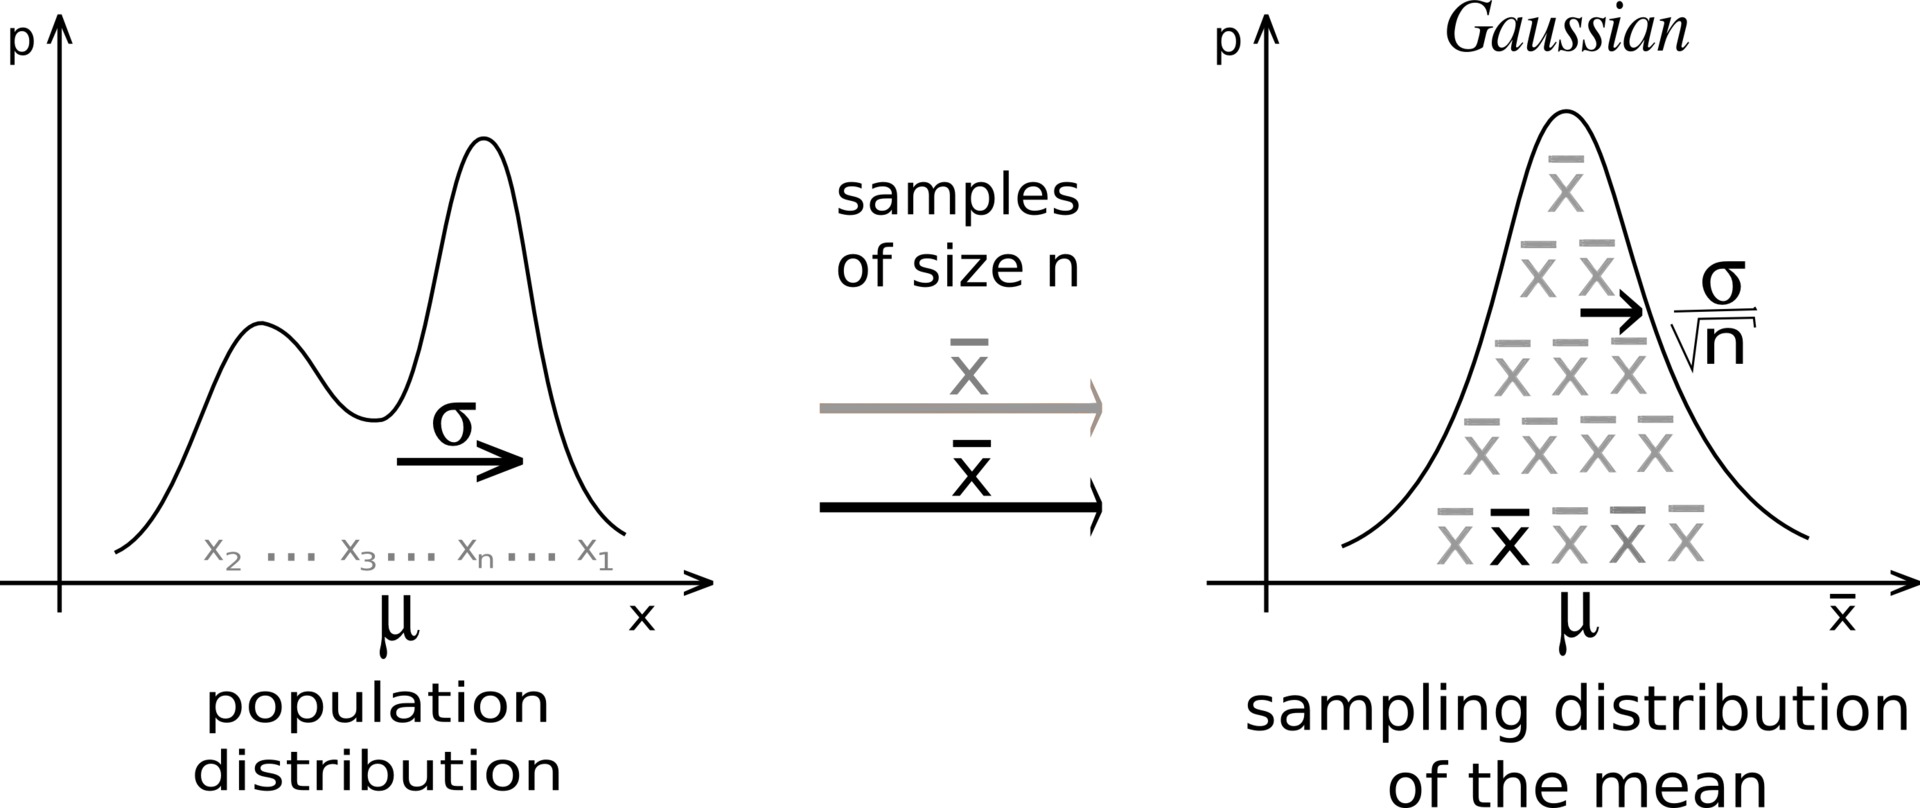

if there is a random variable called X :

    X can be height / weight / ... 
    with some finite pop mean and standard deviation (known)
    from any distribution  , guassian or not. 
    
    from this dist , 
    if we take mutiple samples of size n : 
        
        Dn1 = {x1 , x2 , x3 ,..... ,xn}   # first sample!
        compute mean of Dn1.
    
    such we take total r samples. ,(and take means of all samples)
    Dn1 , Dn2 ,.....Dnr. 
    these sample means will fall into normal distribution.(sampling distribution)
    
    Xbar = x1bar + ...+xnbar
    who's mean will be same as population mean . 
    
    and the standard deviation of sampling distribution is called standard error of mean. 
    

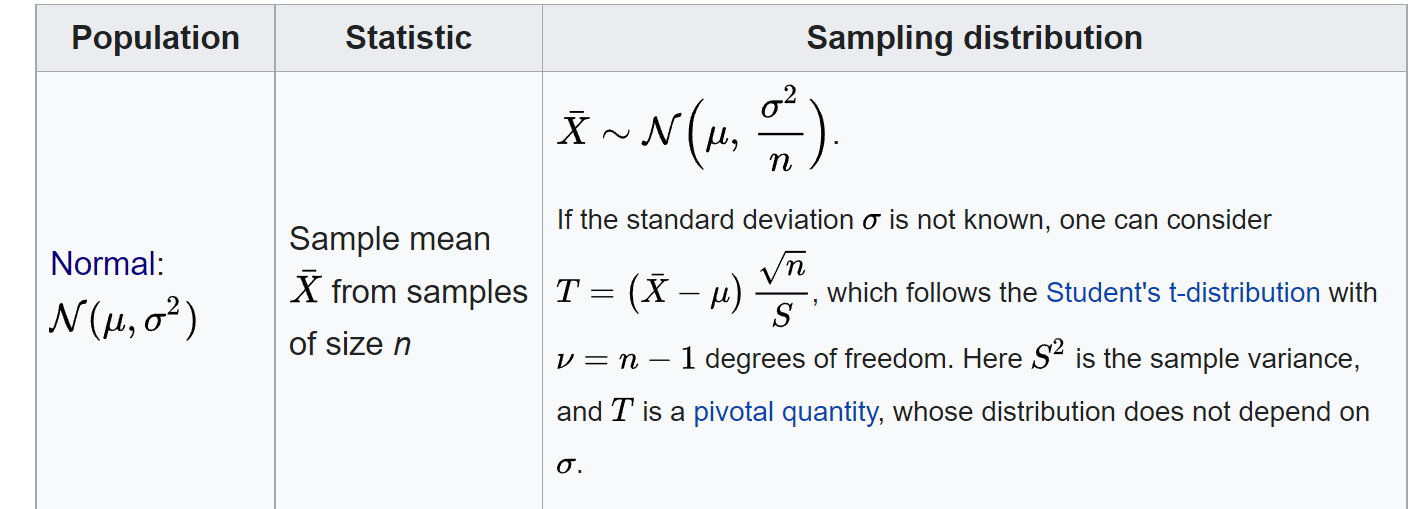

#  Confidence Interval of travel time for one particular location pair! 

In [2]:
df = pd.read_csv("uber_travel_data.csv")

In [3]:
df.sample(100).head(10)

,sourceid,source,dstid,destination,travel_time
259905,15,"H205, Block H, Sarojini Nagar, New Delhi",113,"P-132, Anarkali Colony, Krishna Nagar, Delhi",2234
1273654,82,"286, Asian Games Village Complex, Siri Fort, N...",115,"0 Street Number 3, Azad Nagar, Azad Nagar East...",2752
3857908,244,"Dhingra Park Trail, Punjabi Bagh Cooperative H...",246,"nullShiv Mandir Marg, Block G, Lajpat Nagar I,...",2288
2547703,163,"0 Guru Harkishan Marg, Maulana Azad Society, B...",40,"Gali Saini Tent, Ram Nagar, Shahdara, Delhi",2345
1079954,69,"1129, Sector 2 R K Puram, Sector 2, RK Puram, ...",34,"5/3, East Nathu Colony, GTB Enclave, Dilshad G...",3170
4155330,262,NaN,143,"nullRoad Number 221, Pocket 1, Sector 10 Dwark...",4436
3407786,216,"0 Main Canal Road, Harit Vihar, Mukandpur Part...",229,"200 Road Number 28, Nehru Nagar, Shivaji Place...",1531
3762796,238,NaN,166,"nullRBI Enclave Road, Ankur Enclave, Paschim V...",2069
1747680,114,"9/434, Gandhi Nagar, Seelampur, Shahdara, Delhi",56,NaN,1861
508954,30,"Unnamed Road, Asalatpur Khadar, Delhi",191,"0 Hasanpur, I.P.Extension, Patparganj, Delhi",4607


In [4]:
df.shape

(4542026, 5)

<AxesSubplot:>

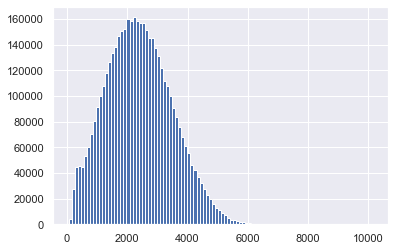

In [5]:
df["travel_time"].hist(bins = 100)

In [6]:
# data is right skeweded.

<AxesSubplot:xlabel='travel_time', ylabel='Density'>

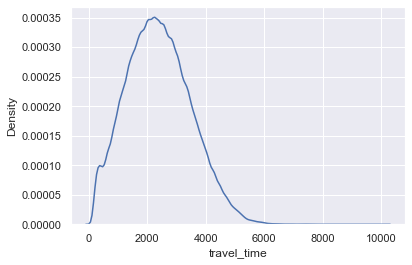

In [7]:
sns.kdeplot(df["travel_time"])

In [8]:
# if we want to know for a particular source and destination 

In [9]:
df.value_counts(["sourceid","dstid"]).sort_values()

sourceid  dstid
69        4        50
167       107      50
          101      50
264       14       50
167       100      50
                   ..
83        88       79
244       32       79
202       201      79
          135      79
45        170      79
Length: 70429, dtype: int64

min 50 and max is 79 of data for each locations 

lets take one pair of data : 

In [16]:
all_destinations = df.groupby(["sourceid","dstid"]).count().reset_index()

In [10]:
data = df.loc[(df["sourceid"]==1) & (df["dstid"]==5)]["travel_time"]

In [11]:
data.shape

(75,)

<AxesSubplot:>

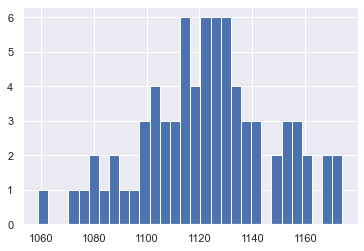

In [12]:
data.hist(bins = 30)

In [28]:
# 95% CI of mean Destination from 1 to 5. 
# above selected data . 

In [29]:
# take multiple sample with replacement (bootstrapping)

- r : number of resampling that i want to do
- sample_size : bootstrap sample be ofthis sample size 

In [30]:
r = 10000
data = df.loc[(df["sourceid"]==1) & (df["dstid"]==5)]["travel_time"]
sample_size = 70
bs_means = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(data,size = sample_size)
    bs_means[i] = np.mean(bs_sample)
        



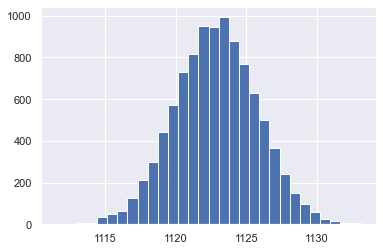

In [31]:
plt.hist(bs_means,bins= 30)
plt.show()

<AxesSubplot:ylabel='Density'>

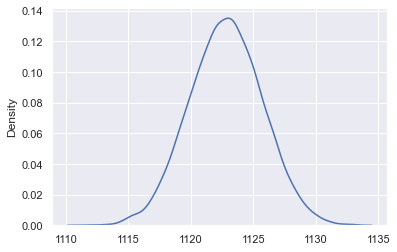

In [32]:
sns.kdeplot(bs_means)

In [33]:
print(np.mean(bs_means)) # sample mean
print(np.std(bs_means))  # standard error of mean

1122.8195514285712
2.9242915393214366


In [34]:
np.std(data)/np.sqrt(sample_size) # standard error of mean

2.930411531855508

In [37]:
np.std(bs_means)

2.9242915393214366

In [35]:
np.mean(bs_means) - 1.95*np.std(bs_means),np.mean(bs_means) + 1.95* np.std(bs_means)

(1117.1171829268944, 1128.521919930248)

In [38]:
np.mean(bs_means) - 1.95*(np.std(data)/np.sqrt(sample_size)),np.mean(bs_means) + 1.95* (np.std(data)/np.sqrt(sample_size))

(1117.105248941453, 1128.5338539156894)

In [36]:
np.percentile(bs_means,2.5),np.percentile(bs_means,97.5)

(1117.1142857142856, 1128.5)

# find 95% CI on 99th pecentile value for travel time via bootstrapping

In [39]:
r = 10000
data = df.loc[(df["sourceid"]==1) & (df["dstid"]==5)]["travel_time"]
sample_size = 70
bs_99p = np.empty(r)

for i in range(r):
    bs_sample = np.random.choice(data,size = sample_size)
    bs_99p[i] = np.percentile(bs_sample,99)

In [40]:
print(np.percentile(bs_99p,2.5),(np.percentile(bs_99p,97.5)))

1161.0 1174.0


In [41]:
np.percentile(bs_99p,99)

1174.0

<AxesSubplot:ylabel='Density'>

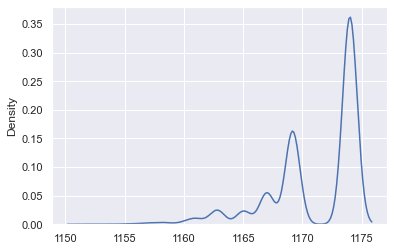

In [43]:
 sns.kdeplot(bs_99p) # CLT not applicable for other than means

# bootstrpping_Confidence_interval

In [57]:
t.ppf(1-(1-(95/100))/2,70-1)

1.9949454146328136

In [56]:
1-(1-(95/100))/2

0.975

In [62]:
def bootstrpping_Confidence_interval(data,r=1000,sample_size = 70,confidence=95):    

    bs_means = np.empty(r)

    for i in range(r):
        bs_sample = np.random.choice(data,size = sample_size)
        bs_means[i] = np.mean(bs_sample)

#     print(np.mean(bs_means)) # sample mean
#     print(np.std(bs_means))  # standard error of mean
    
    tvalue = t.ppf(1-(1-(confidence/100))/2,sample_size-1)
    
    
    np.std(data)/np.sqrt(sample_size) # standard error of mean
    lower = np.mean(bs_means) - tvalue*np.std(bs_means)
    upper = np.mean(bs_means) + tvalue* np.std(bs_means)
    
    print("Sample Mean : ",np.mean(bs_means))
    print("Standard Error :",np.std(bs_means))
    print("Confidence Interval :",lower,upper)
    print("Margin of Error :",tvalue*np.std(bs_means))
    


In [71]:
bootstrpping_Confidence_interval(df["travel_time"],r = 100, sample_size=10000)

Sample Mean :  2392.183302
Standard Error : 11.584960122891923
Confidence Interval : 2369.474448528104 2414.892155471896
Margin of Error : 22.708853471895786


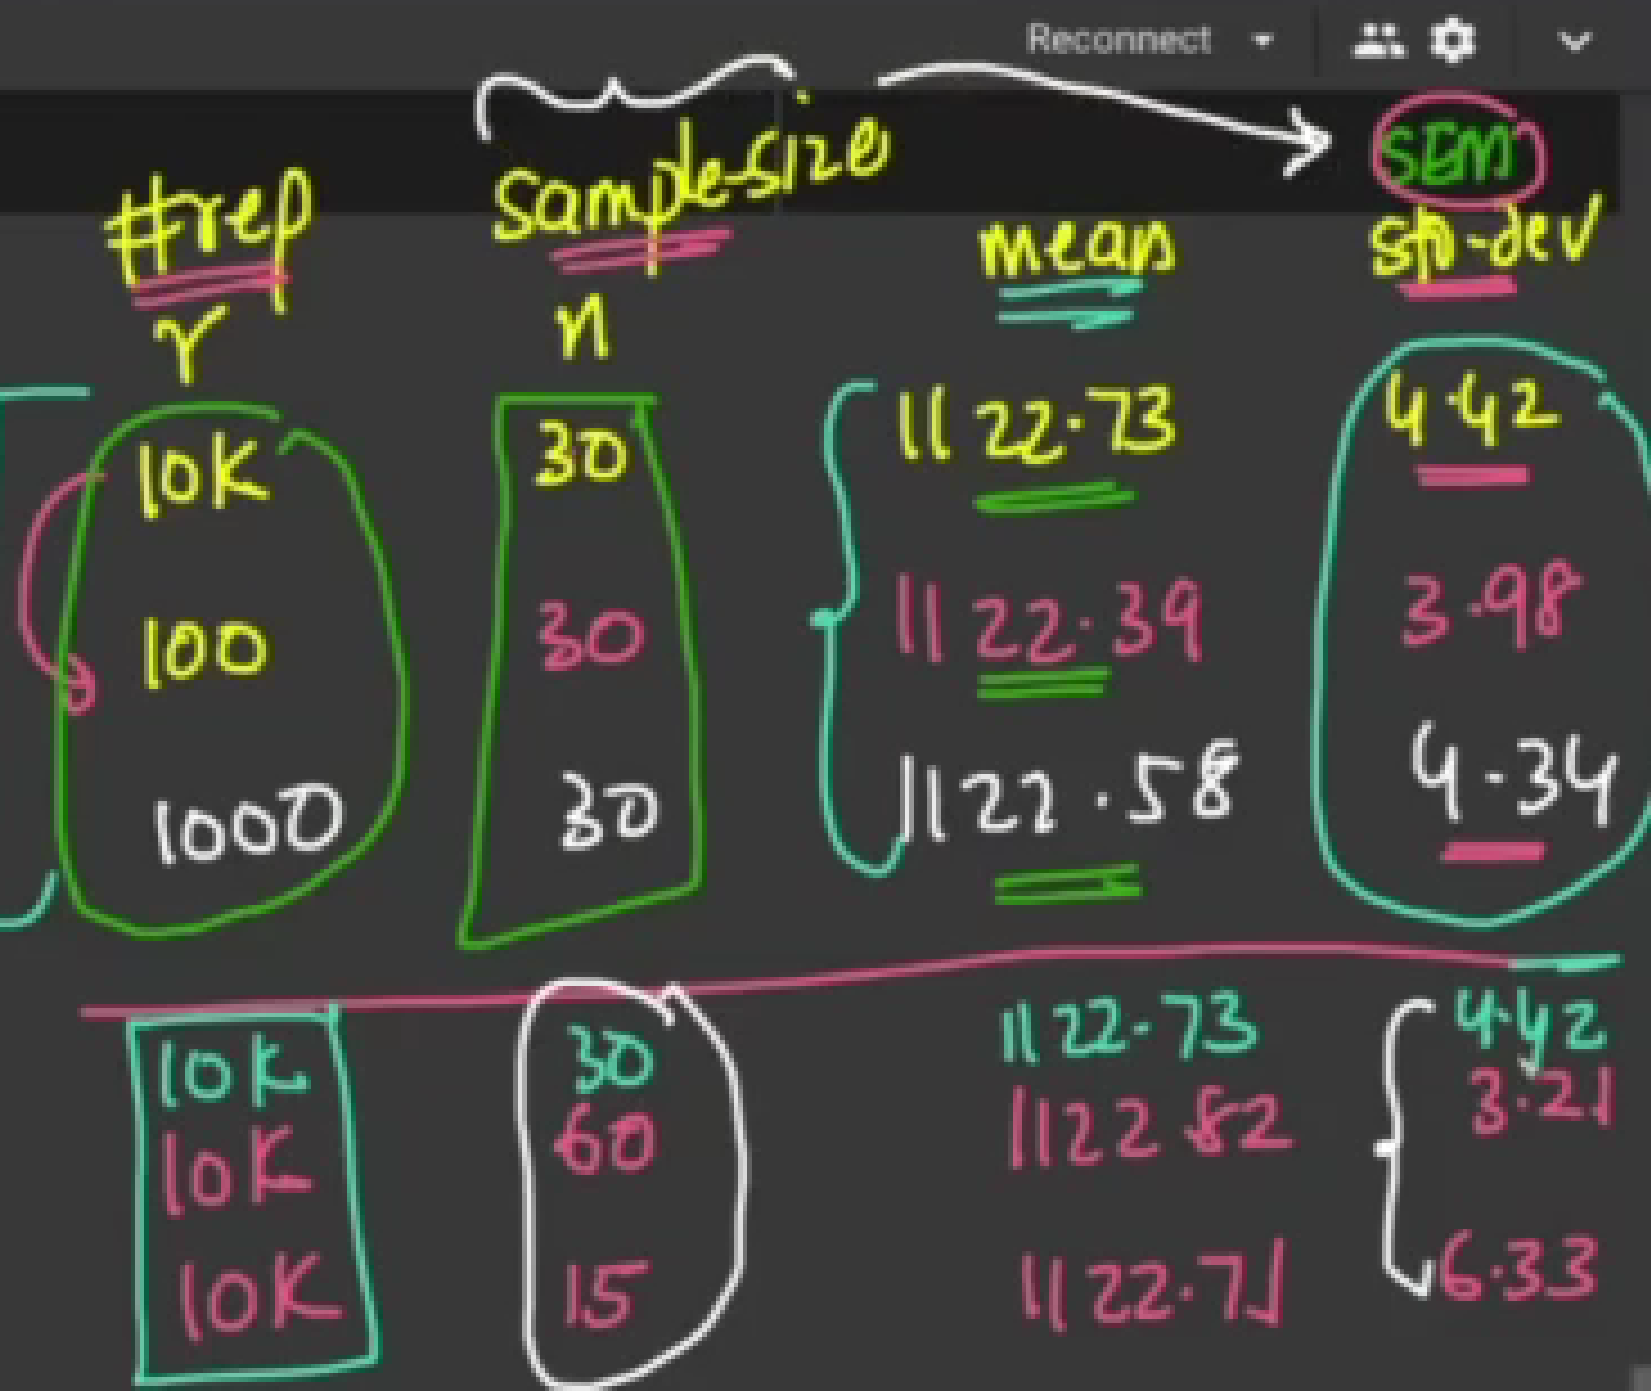

In [44]:
(0.99*0.001)/((0.99*0.001)+(0.005*(1-0.001)))

0.16541353383458646

In [45]:
99/(99+499.5)

0.16541353383458646

In [77]:
(0.95*0.50)/(0.475+0.75*0.50)

0.5588235294117647

In [78]:
(0.50*0.90) + (0.50*0.75)

0.825

In [19]:
all_destinations

,sourceid,dstid,source,destination,travel_time
0,1,1,55,55,55
1,1,2,75,75,75
2,1,3,68,68,68
3,1,4,67,67,67
4,1,5,75,75,75
...,...,...,...,...,...
70424,290,255,0,76,76
70425,290,256,0,55,55
70426,290,264,0,57,57
70427,290,279,0,73,73


In [18]:
all_destinations.sample(50)

,sourceid,dstid,source,destination,travel_time
64853,264,34,69,69,69
28479,120,2,73,73,73
52570,215,214,57,57,57
40372,166,85,50,50,50
42502,174,80,0,59,59
8635,34,118,72,72,72
18634,76,236,75,75,75
5916,22,284,65,65,65
68401,280,282,58,58,58
54639,224,26,52,52,52


In [27]:
df.groupby(["sourceid","dstid"])["travel_time"].aggregate(np.median) 

sourceid  dstid
1         1         255.0
          2         202.0
          3         923.5
          4         933.0
          5        1123.0
                    ...  
290       255      3882.0
          256      1187.0
          264      5264.0
          279      2948.0
          281      2799.0
Name: travel_time, Length: 70429, dtype: float64

In [26]:
df.groupby(["sourceid","dstid"])["travel_time"].mean()

sourceid  dstid
1         1         257.890909
          2         203.613333
          3         922.205882
          4         935.567164
          5        1122.813333
                      ...     
290       255      3879.578947
          256      1189.872727
          264      5262.789474
          279      2948.246575
          281      2799.188679
Name: travel_time, Length: 70429, dtype: float64

In [ ]:
df.aggregate